In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

tdf = pd.read_csv('../m6_머신런닝 알고리즘 이해 및 활용/titanic_train.csv')
tdf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
from sklearn.preprocessing import LabelEncoder
# 전처리 함수 생성
# 결측값 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return(df)

#불필요 컬럼 제거 함수
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)
    return(df)

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Embarked','Sex']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 함수 합치기
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df
    

In [19]:
# 오차행렬 및 정밀도,재현율 f1 roc 함수 만들기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(precision,recall,f1,auc)

In [20]:
# 함수 사용해서 결과 뽑기
y_tdf=tdf['Survived']
x_tdf = tdf.drop('Survived',axis=1)
x_tdf = transform_features(x_tdf)

x_train, x_test, y_train, y_test = train_test_split(x_tdf, y_tdf, test_size=0.2)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(x_train, y_train)
pred_proba = lr_clf.predict_proba(x_test)[:,1]
pred= lr_clf.predict(x_test)
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[98 13]
 [17 51]]
0.796875 0.75 0.7727272727272727 0.8852013778484367


## 교차 검증 KFold

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
import pandas as pd

In [28]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붗꽃 데이터 세트 크기:', features.shape[0])

붗꽃 데이터 세트 크기: 150


In [31]:
n_iter =  0
for train_index, test_index in kfold.split(features):
    x_train,x_test = features[train_index], features[test_index]
    y_train,y_test = label[train_index], label[test_index]
    
    dt_clf.fit(x_train,y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print('{0} 교차검증 정확도 : {1}, 학습데이터 크기 : {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy, train_size, test_size))
    print('{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    print('평균 검증 정확도 : {0}'.format(np.mean(cv_accuracy)))

1 교차검증 정확도 : 1.0, 학습데이터 크기 : 120, 검증 데이터 크기: 30
1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
평균 검증 정확도 : 1.0
2 교차검증 정확도 : 0.9667, 학습데이터 크기 : 120, 검증 데이터 크기: 30
2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
평균 검증 정확도 : 0.98335
3 교차검증 정확도 : 0.9, 학습데이터 크기 : 120, 검증 데이터 크기: 30
3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
평균 검증 정확도 : 0.9555666666666666
4 교차검증 정확도 : 0.9333, 학습데이터 크기 : 120, 검증 데이터 크기: 30
4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
평균 검증 정확도 : 0.95
5 교차검증 정확도 : 0.7667, 학습데이터 크기 : 120, 검증 데이터 크기: 30
5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도 : 0.91334


In [34]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [42]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('교차검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n',label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n',label_test.value_counts())

교차검증:1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64
교차검증:2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64
교차검증:3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64


### StratifiledKFold

In [46]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('교차검증{0}'.format(n_iter))
    print('학습 레이블 데이터 분포:',label_train.value_counts())
    print('검증 레이블 데이터 분포:',label_test.value_counts())

교차검증1
학습 레이블 데이터 분포: 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 0    17
1    17
2    16
Name: label, dtype: int64
교차검증2
학습 레이블 데이터 분포: 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 0    17
2    17
1    16
Name: label, dtype: int64
교차검증3
학습 레이블 데이터 분포: 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 1    17
2    17
0    16
Name: label, dtype: int64


In [49]:
dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiledKFold
for train_index, test_index in skfold.split(features,label):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print('{0} 교차검증 정확도: {1}, 학습데이터크기:{2}, 검증데이터 크기 {3}'.format(n_iter,accuracy,train_size, test_size, ))
    print('{0} 검증세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n 교차검증별 정확도:',np.round(cv_accuracy,4))
print('  평균 검증 정확도:',np.round(np.mean(cv_accuracy),4))

1 교차검증 정확도: 0.98, 학습데이터크기:100, 검증데이터 크기 50
1 검증세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
2 교차검증 정확도: 0.94, 학습데이터크기:100, 검증데이터 크기 50
2 검증세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
3 교차검증 정확도: 0.98, 학습데이터크기:100, 검증데이터 크기 50
3 검증세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 교차검증별 정확도: [0.98 0.94 0.98]
  평균 검증 정확도: 0.9667


### corss_val_score()

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3 )
print('교차검증별 정확도 :',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))

교차검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


* GridSearchCV

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

In [56]:
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(x_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [58]:
display(grid_dtree.best_params_)
grid_dtree.best_score_

{'max_depth': 3, 'min_samples_split': 2}

0.975

In [59]:
estimator = grid_dtree.best_estimator_

pred= estimator.predict(x_test)
accuracy_score(y_test,pred)

0.9666666666666667

# 회귀

In [64]:
!pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 7.5 MB/s eta 0:00:00


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_excel('auto-mpg.xlsx', engine='openpyxl')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [66]:
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [67]:
ndf.dtypes

mpg           float64
cylinders       int64
horsepower     object
weight          int64
dtype: object

In [68]:
ndf['horsepower']=ndf['horsepower'].replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)

In [69]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [70]:
ndf.to_pickle('auto-mpg2.pkl')
ndf = pd.read_pickle('auto-mpg2.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


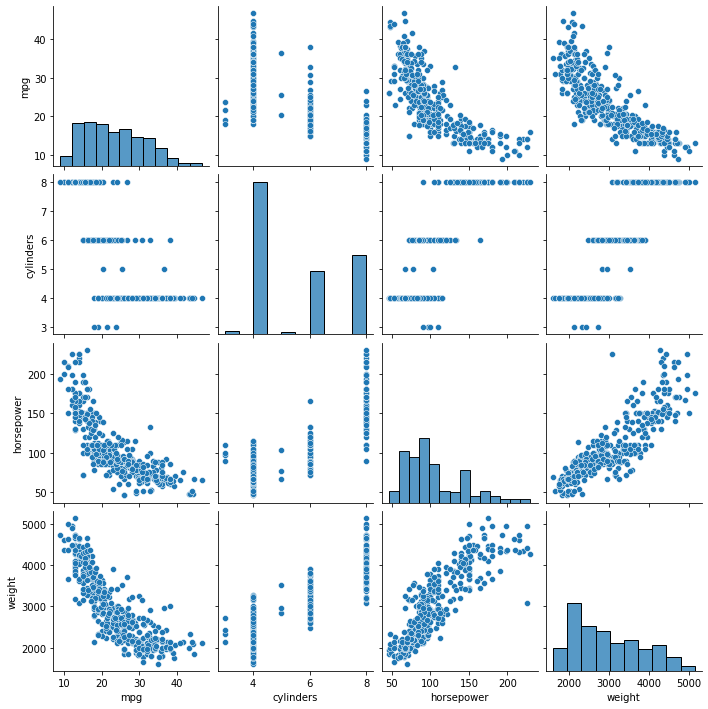

In [71]:
sns.pairplot(ndf)

In [89]:
x = ndf[['weight']]
y = ndf[['mpg']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(len(x_train),len(x_test))

274 118


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

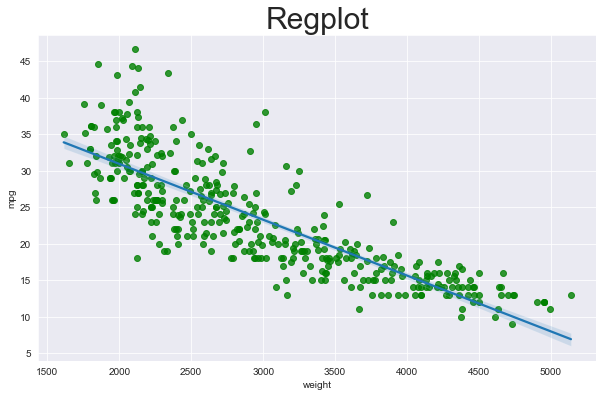

In [90]:
# sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight',y='mpg', data=ndf, scatter_kws={'color':'green'})

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2_score= r2_score(y_test,y_preds)

print(mse, rmse, r2_score)

17.332448631516634 4.163225748325045 0.7181268432220334


In [96]:
print(lr.coef_)
lr.intercept_

[[-0.00783698]]


array([46.86498696])

<AxesSubplot:ylabel='Density'>

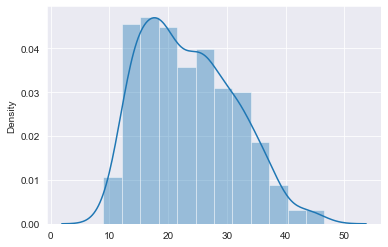

In [97]:
sns.distplot(y)

<AxesSubplot:ylabel='Density'>

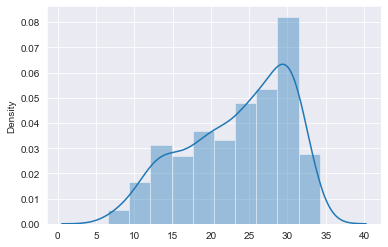

In [98]:
y_hat= lr.predict(x)
sns.distplot(y_hat)

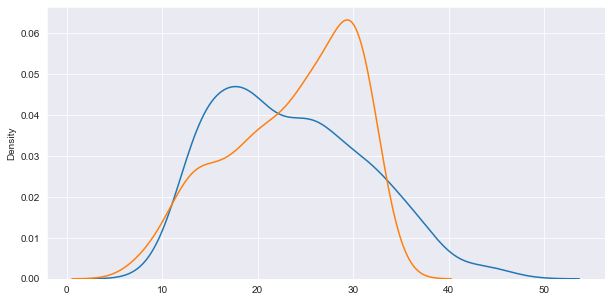

In [101]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False, label='y')
ax2 = sns.distplot(y_hat,hist=False, label='y_hat')

In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

print(x_train.shape, x_train_poly.shape)
print(poly.get_feature_names_out())
print(x_train_poly[:5])
print(x_train[:5])

(274, 1) (274, 3)
['1' 'weight' 'weight^2']
[[1.0000000e+00 3.9880000e+03 1.5904144e+07]
 [1.0000000e+00 2.0200000e+03 4.0804000e+06]
 [1.0000000e+00 2.6780000e+03 7.1716840e+06]
 [1.0000000e+00 1.7730000e+03 3.1435290e+06]
 [1.0000000e+00 2.4640000e+03 6.0712960e+06]]
     weight
87     3988
303    2020
313    2678
53     1773
182    2464


In [104]:
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

x_test_poly = poly.fit_transform(x_test)
r_square = pr.score(x_test_poly,y_test)
r_square

0.7431293677258386

In [105]:
print(lr.coef_)
lr.intercept_

[[-0.00783698]]


array([46.86498696])

Text(0, 0.5, 'mpg')

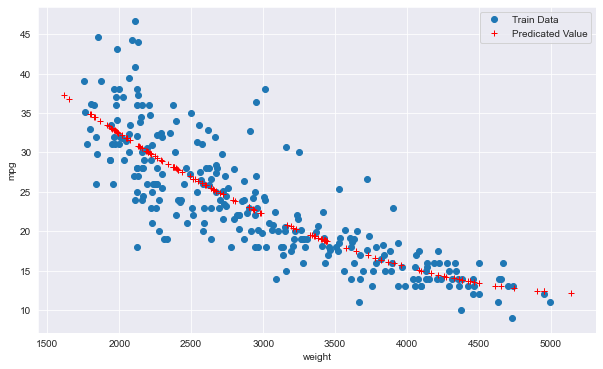

In [106]:
y_hat_test = pr.predict(x_test_poly)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(x_train.values[:,:], y_train.values[:,:],'o',label='Train Data')
ax.plot(x_test.values[:,:], y_hat_test,'r+', label='Predicated Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

## Test!

In [107]:
import pandas as pd

tdf = pd.read_csv('../m6_머신런닝 알고리즘 이해 및 활용/titanic_train.csv')
tdf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [108]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df.Age.fillna(np.mean(df.Age),inplace=True)
    df.Cabin.fillna('N',inplace=True)
    df.Embarked.fillna('N',inplace=True)
    return df

def dropna_features(df):
    df.drop(df[['PassengerId','Name','Ticket']],axis=1,inplace=True)
    return df

def labelencoder(df):
    df.Cabin = df.Cabin.str[:,1]
    features = ['Cabin','Embarked','Sex']    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = dropna_features(df)
    df = labelencoder(df)
    return df

In [128]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score

def get_clf_eval(y_test, pred, pred_proba):
    accuracy = accuracy_score(y_test, pred)
    confusion = confusion_matrix(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율, f1:{2:.4f}, roc:{3:.4f}'.format(accuracy,precision,recall,f1, auc))

In [130]:
y_tdf = tdf['Survived']
x_tdf = tdf.drop('Survived',axis=1)
x_tdf = transform_features(x_tdf)

x_train, x_test, y_train, y_test = train_test_split(x_tdf, y_tdf, test_size=0.2)
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(x_train, y_train)
pred_proba = lr_clf.predict_proba(x_test)[:,1]
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[98 15]
 [18 48]]
정확도:0.8156, 정밀도:0.7619, 재현율, f1:0.7273, roc:0.7442


In [132]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

kfold = KFold(n_splits=5)
cv_accuracy= []
features.shape[0]

150

In [134]:
n_iter = 0
for train_index, test_index in kfold.split(features):
    x_train,x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(x_train,y_train)
    pred = dt_clf.predict(x_test)
    n_iter +=1
    
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    print(accuracy,train_size,test_size)
    
    cv_accuracy.append(accuracy)
print(np.mean(cv_accuracy))

1.0 120 30
1.0 120 30
0.8333 120 30
0.9333 120 30
0.7667 120 30
0.9066599999999999


In [137]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
kfold = KFold(n_splits=3)
n_iter = 3
for train_index, test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    

### 과제 0916_2
- tdf1 데이터셋을 RandomForest 알고리즘을 사용하여 모델링하고 사용자 함수를 작성하여 평가하세요.(분류 평가 방법 전부적용)
- 상기 모델에 대하여 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.
- 상기 모델에 대하여 교차검증 및 성능 개선을 수행하세요.(GridsearchCV 활용)
    - 하이퍼파라미터 : params = {'n_estimators':[50,100,200],
         'max_depth':[2, 4, 6, 8, 10],
         'min_samples_leaf':[2,8,14,20],
         'min_samples_split':[2,8.14,20]}


In [138]:
import pandas as pd
tdf = pd.read_pickle('tdf1.pkl')
tdf.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

def get_rfc_eval(y_test,pred,pred_proba):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬:\n', confusion)
    print(f'정확도: {round(precision,4)}, 재현율 : {round(recall,4)}, f1: {round(f1,4)}, roc: {round(auc,4)}')
    

In [158]:
y_tdf = tdf['Survived']
x_tdf = tdf.drop('Survived',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_tdf, y_tdf, test_size=0.2)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_probar = rfc.predict_proba(x_test)[:,1]
pred = rfc.predict(x_test)

get_rfc_eval(y_test,pred,pred_proba)


오차행렬:
 [[98 11]
 [26 44]]
정확도: 0.8, 재현율 : 0.6286, f1: 0.704, roc: 0.4795


In [162]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(rfc, x_tdf, y_tdf, scoring='accuracy', cv=5 )
print(f'교차 검증별 정확도:',np.round(scores,4))
print(f'평균검증 정확도:',np.round(np.mean(scores),4))

교차 검증별 정확도: [0.7877 0.7921 0.7809 0.7753 0.8483]
평균검증 정확도: 0.7969


In [163]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,100,200], 'max_depth':[2, 4, 6, 8, 10], 'min_samples_leaf':[2,8,14,20], 'min_samples_split':[2,8.14,20]}
grid_rfc = GridSearchCV(rfc, param_grid=params, cv=3, refit=True)
grid_rfc.fit(x_train,y_train)

scores_df = pd.DataFrame(grid_rfc.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split1_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.758400,96,0.777311,0.767932,0.767932
1,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.752845,103,0.726891,0.789030,0.789030
2,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.752822,104,0.743697,0.784810,0.784810
3,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",NaN,140,NaN,NaN,NaN
4,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",NaN,139,NaN,NaN,NaN
...,...,...,...,...,...,...
175,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",NaN,145,NaN,NaN,NaN
176,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",NaN,146,NaN,NaN,NaN
177,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.759807,93,0.777311,0.746835,0.746835
178,"{'max_depth': 10, 'min_samples_leaf': 20, 'min...",0.755611,99,0.760504,0.746835,0.746835


In [165]:
estimator = grid_rfc.best_estimator_
print(estimator)
pred = estimator.predict(x_test)
print(f'테스트 데이터 정확도: {accuracy_score(y_test,pred)}')

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=20,
                       n_estimators=50)
테스트 데이터 정확도: 0.8156424581005587
